# Microsoft Movie Analysis
Nancy Lopez

# Overview
I have been assigned to help Microsoft in its very first movie venture. Since this will be the first movie they will be making I had to take a look at movies from the past and see why they have done so well. After gathering statistical data, I have been able to make recommendations to Microsoft. I have found releasing a movie in June has potential earnings of around 214 million. It is a great month to release a movie and doing an adventure movie will give us a great outcome with millions of gross sales. The average amount an adventure movie makes is 347 million, 145 million above average! Going with a production of an adventure movie has very promising high returns. But what is the cost of making such a great movie? From knowing adventure movie is the best movie kind of movie to make, I now needed to take a look at what will be a good budget with a great profit. The average amount movie production budget is 52 million with 81 million return profit, about 156% return. Adventure movie's average budget is 105 million with a return of 242 million in profits, a 230% return! We also can see a positive correlation between budget and profit, the more it is budgeted the higher the return on profit. After evaluating the data, I am confident Microsoft will be able to make a successful movie by following the recommendations provided.

# Business Problem
Since this is Microsofts first movie they have no idea where to start. In order to give the best solution I have to dig deep and find what has made movies in the past success. I am going to look at movies with the highest gross sales and make three strong recommendations based on my findings. In my analysis, I am going to need to find out if the amount budgeted for the production of the movie returns a higher net profit. I would also like to know if movies released on a certain month throughout the year have higher sales than other months. Lastly, what type of genre movies tend to draw higher net profits. Based on my analysis I will able to provide Microsoft recommendations that will help its first movie be a great success.

# Data Understanding

In [1]:
#importing the packages needed for the notebook
import zipfile
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%matplotlib inline

In [2]:
#importing the dataframes
conn = sqlite3.connect('zippedData/im.db')
basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
directors_df = pd.read_sql("""SELECT * FROM directors;""", conn)
persons_df = pd.read_sql("""SELECT * FROM persons;""", conn)

In [3]:
#checking to what is in the dataframe
basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


The dataframe shows us few basics about the movies

In [4]:
#checking to what is in the dataframe
ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Here we can see the average ratings for the movies in the datafram. 
note -- this dataframe shares movie_id column with basics_df

In [5]:
#checking to what is in the dataframe
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


We are going to have to go in our other dataframe to get more information

In [6]:
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


Here we have information about movie directors.
I have noticed there is not any information about budgets and sales for the movies, which is what I truly need for my analysis

## Movie Gross Data 

In [7]:
#importing dataset from Box Office Mojo
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Great! We have found inforation about movies sales!

In [8]:
#checking info
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#checking to see if there are any null values
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Seems like this dataframe has a lot of missing vaules

## Budgets Data

In [10]:
#importing dataset from The Number
budgets_df = pd.read_csv(
    'zippedData/tn.movie_budgets.csv.gz', index_col=0)
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
#checking info
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


Perfect seems like no missing data! We have almost 6,000 movies in Dataframe.

In [12]:
#comfirming there are no missing values
budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

I decided not to use movie_gross dataframe since there was alot of missing values, the information about budgets and gross can be found in budgets_df



Movie Info Data

In [13]:
#importing dataset from Rotten Tomatoes
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',
    sep='\t', index_col=0)
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


There are a lot of columns in this dataframe that I will not be using, I am going to go ahead to drop them now.

In [14]:
#drop unnessary columns to have a better look at dataframe
movie_info_df = movie_info_df.drop(columns=['synopsis', 'director', 'writer',
                'dvd_date', 'runtime', 'studio', 'box_office', 'currency', 'studio'])
movie_info_df.head()

,rating,genre,theater_date
id,,,
1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971"
3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012"
5,R,Drama|Musical and Performing Arts,"Sep 13, 1996"
6,R,Drama|Mystery and Suspense,"Dec 9, 1994"
7,NR,Drama|Romance,NaN


This dataframe contains movie genre information

In [15]:
#checking for missing values
movie_info_df.isna().sum()

rating            3
genre             8
theater_date    359
dtype: int64

We have very few missing values

## Movies Data

In [16]:
#importing dataset from The Movie DB
movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


We have found genre in this datafram as well.

In [17]:
#getting more information
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


We have alot of great data here!

# Cleaning Data

In [18]:
#renamaming columns
budgets_df = budgets_df.rename(columns={'movie':'title', 'production_budget': 'budget'})
budgets_df.columns

Index(['release_date', 'title', 'budget', 'domestic_gross', 'worldwide_gross'], dtype='object')

In [19]:
# checking for duplicates
budgets_df.duplicated('title').sum()

84

In [20]:
budgets_df['title'].is_unique

False

In [21]:
#droping duplicates in 'title'
budgets_df= budgets_df.drop_duplicates('title')
#confirming there are no more duplicates in 'title'
budgets_df['title'].is_unique

True

In [22]:
#cleaning gross and budgets columns values
#removing dollar signs and commas from dollar amounts
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
budgets_df['budget'] = budgets_df['budget'].str.replace(',', '').str.replace('$', '').astype(int)
#checking to see if the datframe now looks the way I want it
budgets_df.head()

,release_date,title,budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [23]:
#making a new profit column
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['budget']
budgets_df.head()

,release_date,title,budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [24]:
#changing budget, profit, worldwide_gross into millions make it more appealing
budgets_df['budget_million'] = budgets_df['budget']/1000000
budgets_df['ww_gross_million'] = budgets_df['worldwide_gross']/1000000
budgets_df['profit_million'] = budgets_df['profit']/1000000
#checking change
budgets_df.head(3)

,release_date,title,budget,domestic_gross,worldwide_gross,profit,budget_million,ww_gross_million,profit_million
id,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,425.0,2776.345279,2351.345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,410.6,1045.663875,635.063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,350.0,149.762350,-200.237650


In [25]:
#dropping old coulmns
budgets_df = budgets_df.drop(columns=['budget', 'domestic_gross', 'worldwide_gross'])

Now the budget_df is cleaned up, I want to check and see which data frame would be best to use to get genre information from the movies

In [26]:
#checking the shape of basics_df
basics_df.shape

(146144, 6)

In [27]:
#checking the shape of movies_df
movies_df.shape

(26517, 9)

We seem to have more inforation in basics_df, I want to check for duplicates now

In [28]:
#checking for duplicates
basics_df.duplicated('original_title').sum()

8370

In [29]:
#checking for duplicates
movies_df.duplicated('original_title').sum()

1682

Seems like movies_df has fewer duplicates
I want to see if both data frames include the movie Avatar -- one of the top movies made

In [30]:
#checking to see if Avatar is found in dataframe
budgets_df[budgets_df.title == 'Avatar']

,release_date,title,profit,budget_million,ww_gross_million,profit_million
id,,,,,,
1,"Dec 18, 2009",Avatar,2351345279,425.0,2776.345279,2351.345279


In [31]:
#checking to see if Avatar is found in dataframe
basics_df[basics_df.original_title == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres


In [32]:
#checking to see if Avatar is found in dataframe
movies_df[movies_df.original_title == 'Avatar']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676


Since Avatar is movie well-known movie and one of the best gross sales (based on our budgets_df), I have decided not to use basics_df since it is not included.

In [33]:
#taking a look at movies_df
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


Time to clean Movies Dataframe

In [34]:
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [35]:
#checking for null values
movies_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [36]:
#dropping columns
movies_df= movies_df.drop(columns=['release_date', 'original_language', 'original_title', 'id', 'vote_average', 'vote_count', 'popularity'])
movies_df.head()

,genre_ids,title
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",How to Train Your Dragon
2,"[12, 28, 878]",Iron Man 2
3,"[16, 35, 10751]",Toy Story
4,"[28, 878, 12]",Inception


In [37]:
#renaming columns
movies_df = movies_df.rename(columns={'original_title':'title', 'genre_ids':'genre'})

In [38]:
#checking for duplicates in 'title'
movies_df.duplicated('title').sum()

1829

In [39]:
#droping duplicates
movies_df= movies_df.drop_duplicates('title')
movies_df.duplicated('title').sum()

0

In [40]:
#changing genre ids to there aquired genre type 
from ast import literal_eval
#adding id_code to decode our movies genre id
id_code = {28: 'action', 12: 'adventure', 16: 'animation', 35: 'comedy', 80: 
           'crime', 99: 'documentary', 18: 'drama', 10751: 'family', 14: 'fantasy', 
           36: 'history', 27: 'horror', 10402: 'music', 9648: 'mystery', 10749: 'romance', 
           878: 'sci-fi', 10770: 'tv movie', 53: 'thriller', 10752: 'war', 37: 'western'}

movies_df['genre'] = movies_df.genre.apply(lambda x: [id_code[i] for i in literal_eval(x)])
#checking to make sure changes have been applied
movies_df.head()

,genre,title
0,"[adventure, fantasy, family]",Harry Potter and the Deathly Hallows: Part 1
1,"[fantasy, adventure, animation, family]",How to Train Your Dragon
2,"[adventure, action, sci-fi]",Iron Man 2
3,"[animation, comedy, family]",Toy Story
4,"[action, sci-fi, adventure]",Inception


In [41]:
budgets_df.columns

Index(['release_date', 'title', 'profit', 'budget_million', 'ww_gross_million',
       'profit_million'],
      dtype='object')

In [42]:
budgets_df.shape

(5698, 6)

In [43]:
movies_df.columns

Index(['genre', 'title'], dtype='object')

In [44]:
movies_df.shape

(24688, 2)

# Merge Data Together

In [45]:
#merging data together
merged_df = pd.merge(budgets_df, movies_df, how='inner')
merged_df.head()

,release_date,title,profit,budget_million,ww_gross_million,profit_million,genre
0,"Dec 18, 2009",Avatar,2351345279,425.0,2776.345279,2351.345279,"[action, adventure, fantasy, sci-fi]"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,635063875,410.6,1045.663875,635.063875,"[adventure, action, fantasy]"
2,"May 1, 2015",Avengers: Age of Ultron,1072413963,330.6,1403.013963,1072.413963,"[action, adventure, sci-fi]"
3,"Apr 27, 2018",Avengers: Infinity War,1748134200,300.0,2048.134200,1748.134200,"[adventure, action, fantasy]"
4,"Nov 17, 2017",Justice League,355945209,300.0,655.945209,355.945209,"[action, adventure, fantasy, sci-fi]"


In [46]:
#checking to make sure there is no duplcates with 'title'
merged_df.duplicated('title').sum()

0

In [47]:
merged_df['title'].is_unique

True

In [48]:
#checking for any null values in our new data frame
merged_df.isna().sum()

release_date        0
title               0
profit              0
budget_million      0
ww_gross_million    0
profit_million      0
genre               0
dtype: int64

In [49]:
#adding a new 'release_momth' column to be able to plot
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
# create 'release_month' column
merged_df['release_month'] = merged_df['release_date'].dt.strftime('%B')
merged_df.head()

,release_date,title,profit,budget_million,ww_gross_million,profit_million,genre,release_month
0,2009-12-18,Avatar,2351345279,425.0,2776.345279,2351.345279,"[action, adventure, fantasy, sci-fi]",December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,635063875,410.6,1045.663875,635.063875,"[adventure, action, fantasy]",May
2,2015-05-01,Avengers: Age of Ultron,1072413963,330.6,1403.013963,1072.413963,"[action, adventure, sci-fi]",May
3,2018-04-27,Avengers: Infinity War,1748134200,300.0,2048.134200,1748.134200,"[adventure, action, fantasy]",April
4,2017-11-17,Justice League,355945209,300.0,655.945209,355.945209,"[action, adventure, fantasy, sci-fi]",November


In [50]:
#starting to create a genre dataframe by exploding genre column
genre_df = merged_df.explode('genre')
genre_df.head()

,release_date,title,profit,budget_million,ww_gross_million,profit_million,genre,release_month
0,2009-12-18,Avatar,2351345279,425.0,2776.345279,2351.345279,action,December
0,2009-12-18,Avatar,2351345279,425.0,2776.345279,2351.345279,adventure,December
0,2009-12-18,Avatar,2351345279,425.0,2776.345279,2351.345279,fantasy,December
0,2009-12-18,Avatar,2351345279,425.0,2776.345279,2351.345279,sci-fi,December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,635063875,410.6,1045.663875,635.063875,adventure,May


In [51]:
#dropping columns
genre_df = genre_df.drop(columns=['release_date', 'release_month', 'profit'])
#checking drop of columns
genre_df.head(3)

,title,budget_million,ww_gross_million,profit_million,genre
0,Avatar,425.0,2776.345279,2351.345279,action
0,Avatar,425.0,2776.345279,2351.345279,adventure
0,Avatar,425.0,2776.345279,2351.345279,fantasy


In [52]:
#grouping data by the genre and getting an average
genre_grouped = genre_df.groupby(['genre']).agg('mean')

In [53]:
#making a new variable to be sorted by profit
genre_ww_gross = genre_grouped.sort_values(['ww_gross_million'], ascending=False)

In [54]:
#checking our new data 
genre_ww_gross['ww_gross_million']

genre
adventure      347.306754
animation      325.518774
fantasy        300.453431
family         268.635003
sci-fi         256.315989
action         235.188097
comedy         119.887038
thriller        95.515536
crime           95.507983
war             95.141545
western         94.762433
mystery         82.286449
music           81.886213
romance         75.305910
drama           71.942473
history         63.374190
horror          58.505575
tv movie        56.782123
documentary     47.022620
Name: ww_gross_million, dtype: float64

In [55]:
#finding the value counts for 'release_month'
merged_df['release_month'].value_counts()

December     221
October      186
March        169
September    168
November     164
April        162
August       161
July         157
June         148
February     133
May          128
January      127
Name: release_month, dtype: int64

In [56]:
# finding value counts for each movie genre 
genre_count = pd.DataFrame(merged_df.genre.values.tolist()).stack().value_counts()
genre_count

drama          873
comedy         584
thriller       518
action         472
adventure      298
horror         258
crime          241
romance        233
sci-fi         217
family         187
fantasy        178
mystery        140
animation      123
history         70
documentary     69
music           47
war             47
western         24
tv movie        10
dtype: int64

In [57]:
genre_ww_gross['ww_gross_million'].describe()

count     19.000000
mean     145.859902
std      103.723207
min       47.022620
25%       73.624192
50%       95.141545
75%      245.752043
max      347.306754
Name: ww_gross_million, dtype: float64

## Plotting Data and Evaluation

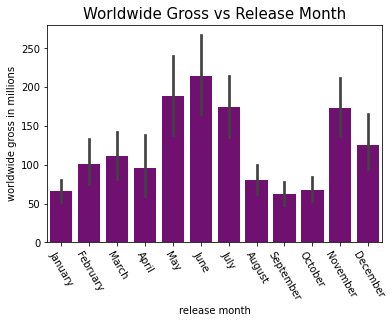

In [58]:
#plotting a bar graph to see which months have higher sales
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']

sns.barplot(data=merged_df, x='release_month', y='ww_gross_million', order=months, 
            color='purple')
plt.xticks(rotation=-60)
plt.ylabel('worldwide gross in millions')
plt.xlabel('release month')
plt.title('Worldwide Gross vs Release Month', fontsize = 15);

In [59]:
#creating a data frame with release month being sorted my top gross month
release_month = merged_df['ww_gross_million'].groupby(merged_df['release_month']).agg('mean')
release_month.sort_values(ascending=False)
                                             

release_month
June         214.190098
May          188.595157
July         174.404827
November     172.895549
December     125.474736
March        111.337622
February     100.801383
April         96.294706
August        80.539336
October       67.900675
January       66.197590
September     62.196544
Name: ww_gross_million, dtype: float64

In [60]:
release_month.describe()

count     12.000000
mean     121.735685
std       52.950837
min       62.196544
25%       77.379671
50%      106.069502
75%      173.272868
max      214.190098
Name: ww_gross_million, dtype: float64

In [61]:
#getting stats of merge_df by budget
merged_df['budget_million'].describe()

count    1924.000000
mean       38.702950
std        52.049626
min         0.009000
25%         5.000000
50%        20.000000
75%        50.000000
max       425.000000
Name: budget_million, dtype: float64

In [62]:
#getting stats of merge_df by budget
merged_df['profit_million'].describe()

count    1924.000000
mean       81.661663
std       184.172401
min      -110.450242
25%        -1.802427
50%        13.614248
75%        77.920381
max      2351.345279
Name: profit_million, dtype: float64

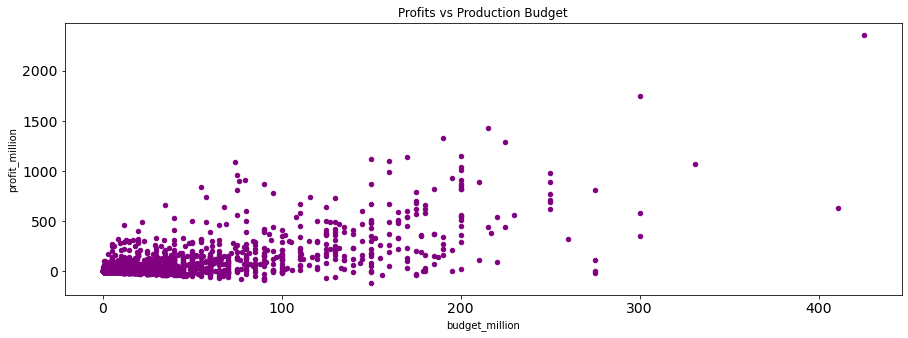

In [63]:
#buget vs profit scatterplot
merged_df.plot(kind='scatter', figsize=(15,5), x='budget_million', y='profit_million', c='purple',  
               title='Profits vs Production Budget', xlabel='budget', ylabel='profit', fontsize=14);

Evaluation: The average amount bugeted for movies is 39 million with a profit average of 82 million. I also found only 25% of movies went past a 50 million budget and the thrid quartile in movie profits were 77 million which is really close to our average profit of movie sales. Also also on the graph there is a positive correlation between profits and movie production budgets. The higher movie production budget is, the higher of a possible movie profit will return high.

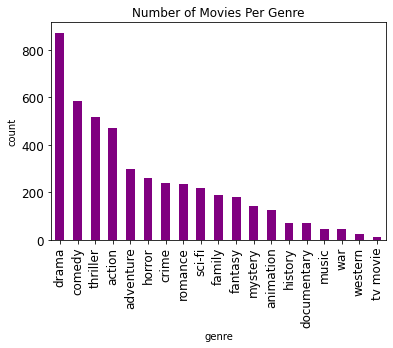

In [76]:
#ploting movies per genre 
pd.DataFrame(merged_df.genre.values.tolist()).stack().value_counts().plot(
    kind='bar', 
    xlabel='genre',
    ylabel='count', 
    title = 'Number of Movies Per Genre',
    color='purple',
    fontsize=12);


In [77]:
#genre stats by gross
genre_ww_gross['ww_gross_million'].describe()

count     19.000000
mean     145.859902
std      103.723207
min       47.022620
25%       73.624192
50%       95.141545
75%      245.752043
max      347.306754
Name: ww_gross_million, dtype: float64

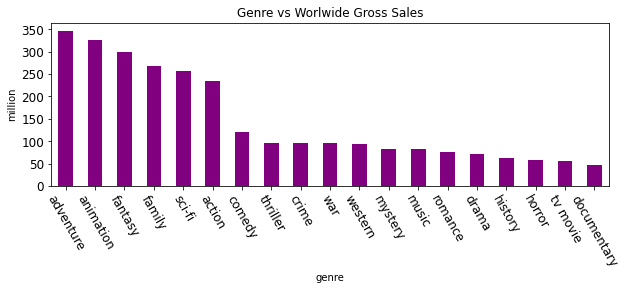

In [97]:
#bar graph of genre vs worldwide gross
genre_ww_gross['ww_gross_million'].plot(figsize=(10,3), kind='bar', color='purple', fontsize=12)
plt.title('Genre vs Worlwide Gross Sales')
plt.xlabel("genre")
plt.xticks(rotation=-60)
plt.ylabel("million")
plt.show()


In [98]:
#taking a look at dataframe
genre_ww_gross['ww_gross_million']

genre
adventure      347.306754
animation      325.518774
fantasy        300.453431
family         268.635003
sci-fi         256.315989
action         235.188097
comedy         119.887038
thriller        95.515536
crime           95.507983
war             95.141545
western         94.762433
mystery         82.286449
music           81.886213
romance         75.305910
drama           71.942473
history         63.374190
horror          58.505575
tv movie        56.782123
documentary     47.022620
Name: ww_gross_million, dtype: float64

Evaluation: Adventure movies have the highest worldwide gross sales at 347 million vs other movies genre. Even though alot of movies are drama movies, they fall under the first quartile of 74 million. 25% of our data falls below the 74 million which is not a good spot to be when a movie is trying to make the most worldwide gross sales. A adventure genre movie has a better chance fo success. Even animation with 323 million and fantasy with 300 million do not fall far behind. They are still over the average of 202 million compared to other genre movies in worldwide gross.

Before making a conclusion on the amount Microsoft should budget there movie production. I want to go back to dig a little deeper and make an analysis on adventure movies budget by profits.

In [99]:
#creating a new adventure dataframe
avnt_df = genre_df[genre_df.genre == 'adventure']
avnt_df

,title,budget_million,ww_gross_million,profit_million,genre
0,Avatar,425.000,2776.345279,2351.345279,adventure
1,Pirates of the Caribbean: On Stranger Tides,410.600,1045.663875,635.063875,adventure
2,Avengers: Age of Ultron,330.600,1403.013963,1072.413963,adventure
3,Avengers: Infinity War,300.000,2048.134200,1748.134200,adventure
4,Justice League,300.000,655.945209,355.945209,adventure
...,...,...,...,...,...
1722,Above and Beyond,1.300,0.288751,-1.011249,adventure
1751,The Green Inferno,1.000,12.931420,11.931420,adventure
1765,Antarctica: A Year on Ice,1.000,0.288757,-0.711243,adventure
1878,Arrowhead,0.180,0.000000,-0.180000,adventure


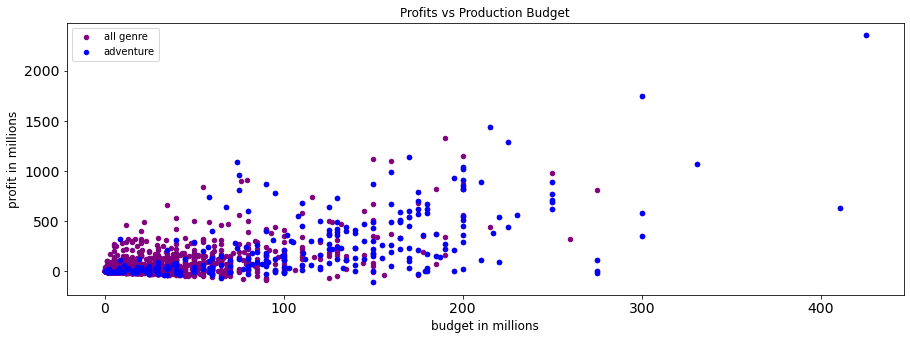

In [100]:
#plotting a graph to show all movie genre by profit
ax = merged_df.plot( x='budget_million', y='profit_million', kind='scatter', figsize=(15,5), c='purple',  
               title='Profits vs Production Budget', label='all genre', fontsize=14);
#adding plot to show adventure movies by profit
avnt_df.plot(x='budget_million', y='profit_million', kind='scatter', c='blue', label='adventure', ax=ax);

ax.set_xlabel('budget in millions', fontsize=12)
ax.set_ylabel('profit in millions', fontsize=12)

plt.show()

In [101]:
avnt_df['budget_million'].describe()

count    298.000000
mean     105.198674
std       76.792074
min        0.025000
25%       40.000000
50%       97.000000
75%      160.000000
max      425.000000
Name: budget_million, dtype: float64

In [102]:
avnt_df['profit_million'].describe()

count     298.000000
mean      242.108079
std       324.260846
min      -110.450242
25%        14.654647
50%       116.199551
75%       367.295552
max      2351.345279
Name: profit_million, dtype: float64

Evaluation: After going back and doing my reanalysis, there is a slightly higher budget for adventure movies. Even though the average budget spent is 105 million and half the movies spent at least over 97 million with an average of 242 million. An adventure movie with a production budget of 100 million has a high chance of it returning more than double the profit.

## Conclusion

After my evaluations I would like to recommend the following to Microsoft for their first movie venture:

Release Month
- June

June proved to us it is the best time to release a movie with worldwide gross sales of 214 million. While September would be a month to avoid, it was the lowest month in gross sales with only 62 million.

Genre
- Aventure 

Compared to other movie genres an adventure movie has the highest worldwide gross of 347 million. Also, it surpasses the average worldwide gross of all genres by 202 million!

Production Budget
- 100 million


The production budget should be aimed to be at 100 million. It has a high potential to return double in profits of what is spent on production.

I am confident Microsoft will be able to make a great movie based on these recommendations.